# QUESTION OR REASON FOR ANALYSIS

What are the factors the factors that affects medical cost charges , and the relation between all the factor directly or indirectly?

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets_13720_18513_insurance.csv


# *IMPORTING MY DATA SETS *

In [2]:
df = pd.read_csv('/kaggle/input/datasets_13720_18513_insurance.csv')


# DESCRIBING , SUMMARISING AND CLEANING THE  DATA 

In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df[pd.isnull(df)]

,age,sex,bmi,children,smoker,region,charges
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1336,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# GRAPHS AND ANALYSIS IMPORT STATEMENTS


In [10]:
%matplotlib notebook
%matplotlib inline


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [12]:
for style in plt.style.available:
    print(style)

Solarize_Light2
_classic_test_patch
bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
seaborn
seaborn-bright
seaborn-colorblind
seaborn-dark
seaborn-dark-palette
seaborn-darkgrid
seaborn-deep
seaborn-muted
seaborn-notebook
seaborn-paper
seaborn-pastel
seaborn-poster
seaborn-talk
seaborn-ticks
seaborn-white
seaborn-whitegrid
tableau-colorblind10


In [13]:
df.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [14]:
df.charges.unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

# **GRAPHS AND FIGURES**

SOME BASIC INFORMATION GRAPGHS

<Figure size 14400x2880 with 0 Axes>

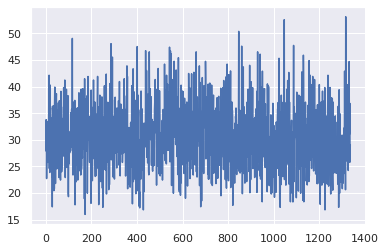

<Figure size 14400x2880 with 0 Axes>

In [93]:
plt.plot(df.bmi)
plt.figure(figsize=(200,40))

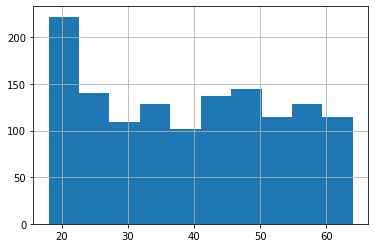

In [16]:
df.age.hist()

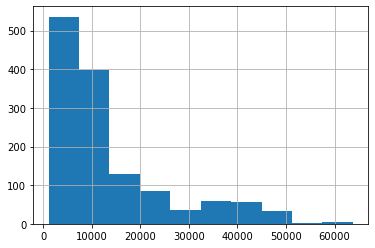

In [17]:
df.charges.hist()

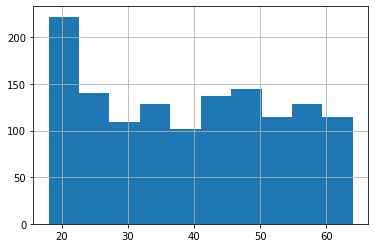

In [18]:
df.age.hist()

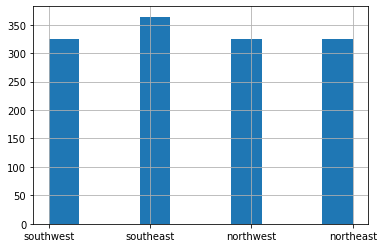

In [19]:
df.region.hist()

Text(0.5, 1.0, 'Various age groups')

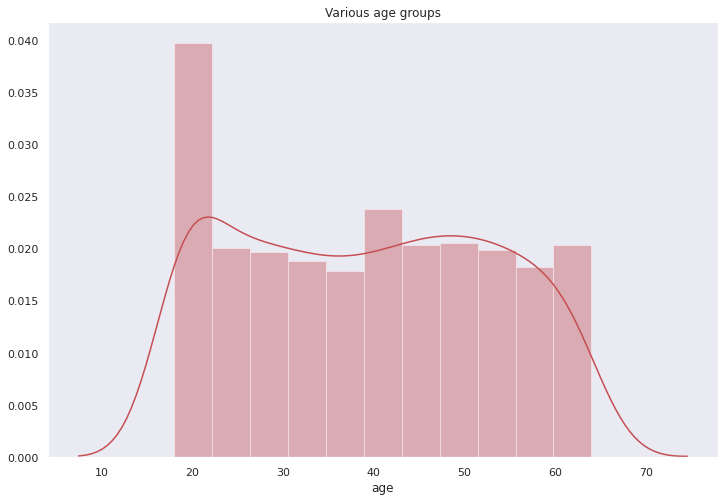

In [20]:
sns.set(style='dark')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['age'], kde = True, color = 'r')
plt.title('Various age groups')

Text(0, 0.5, ' Average Children')

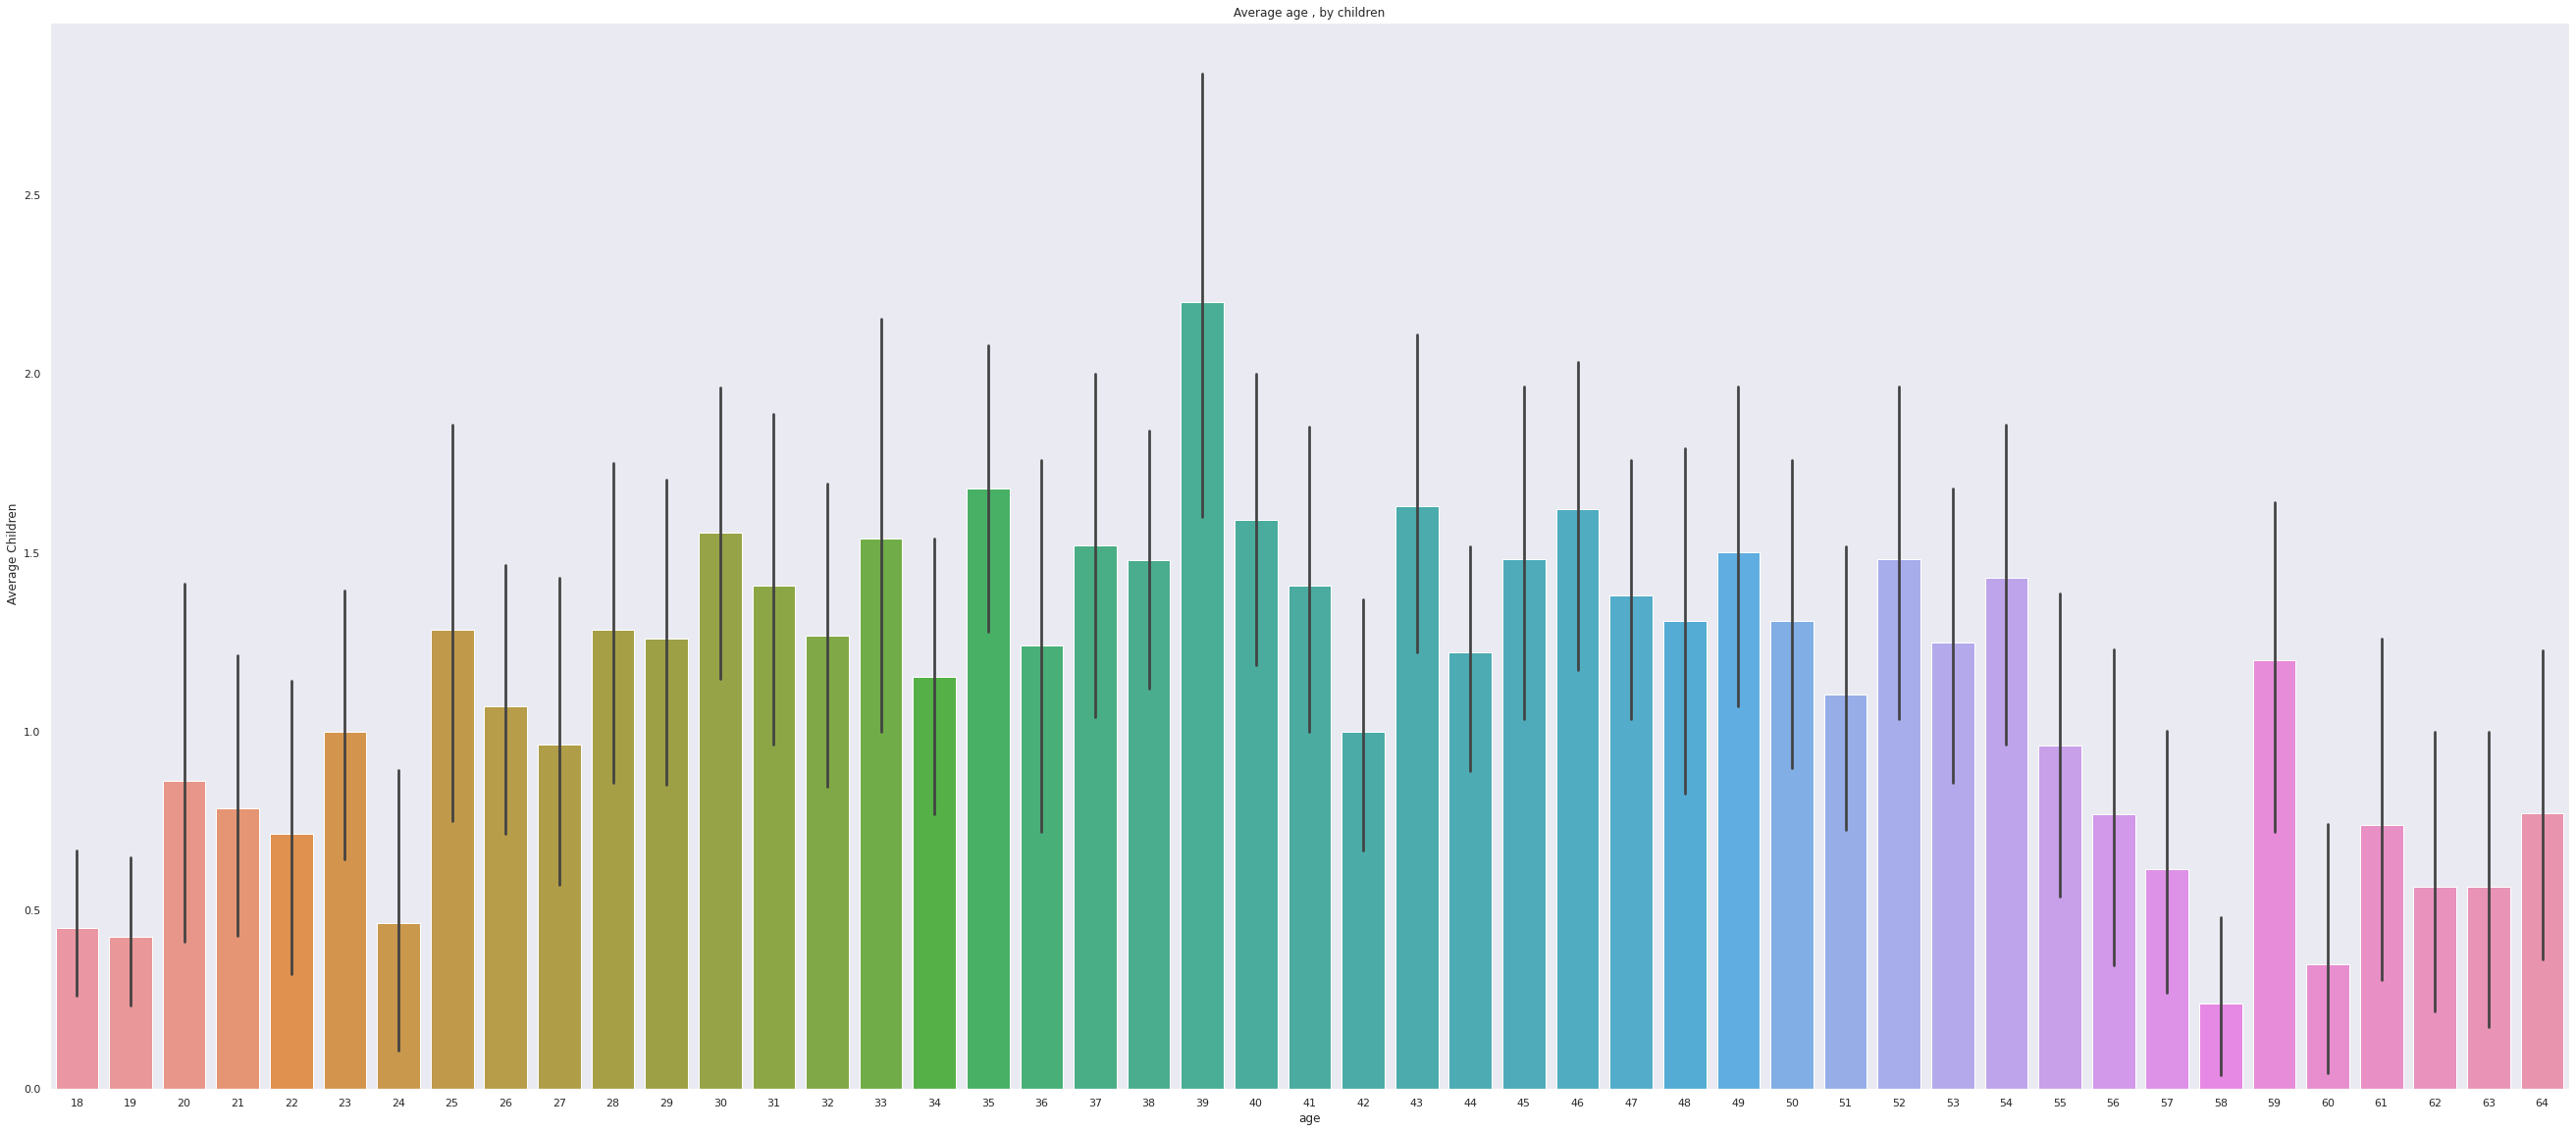

In [21]:
plt.figure(figsize=(46,20))

plt.title("Average age , by children")

sns.barplot(x=df.age, y=df.children)

plt.ylabel(" Average Children")

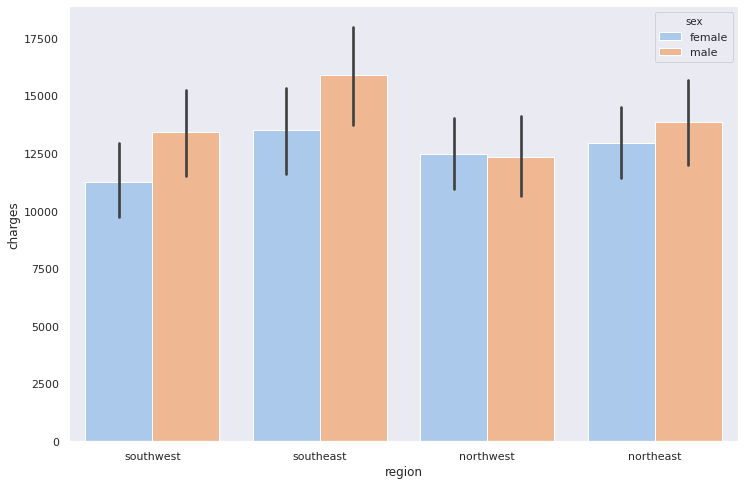

In [22]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='pastel')

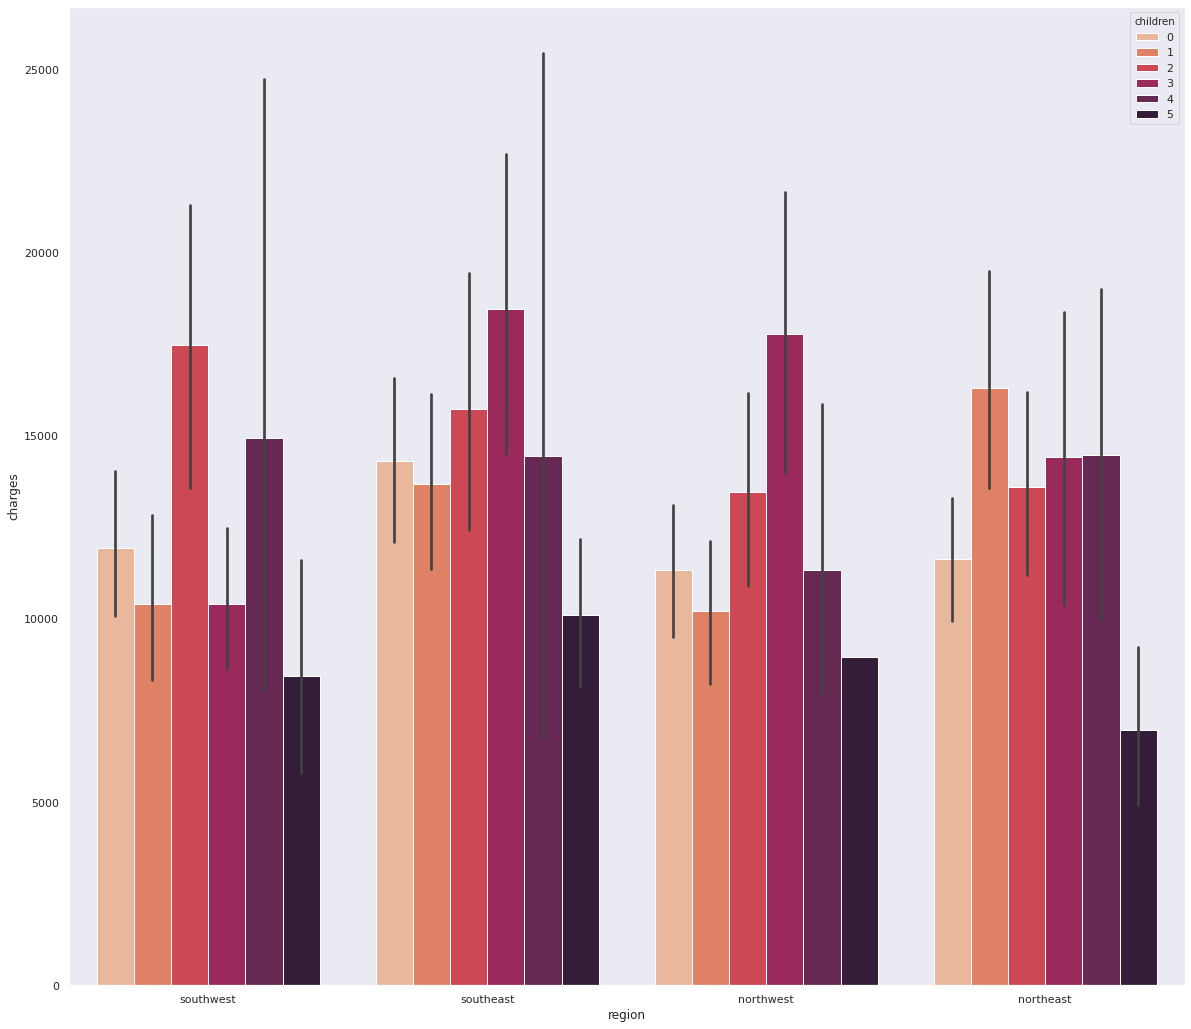

In [23]:
f, ax = plt.subplots(1, 1, figsize=(20, 18))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='rocket_r')

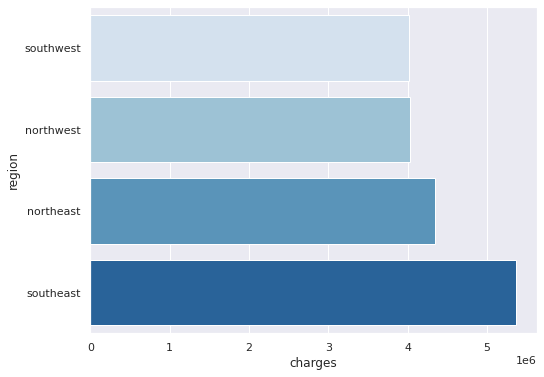

In [24]:
sns.set(style='darkgrid')
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

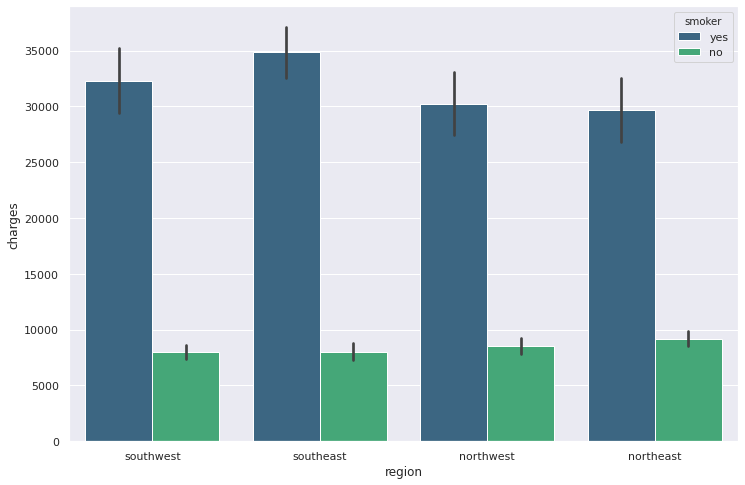

In [25]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='viridis')

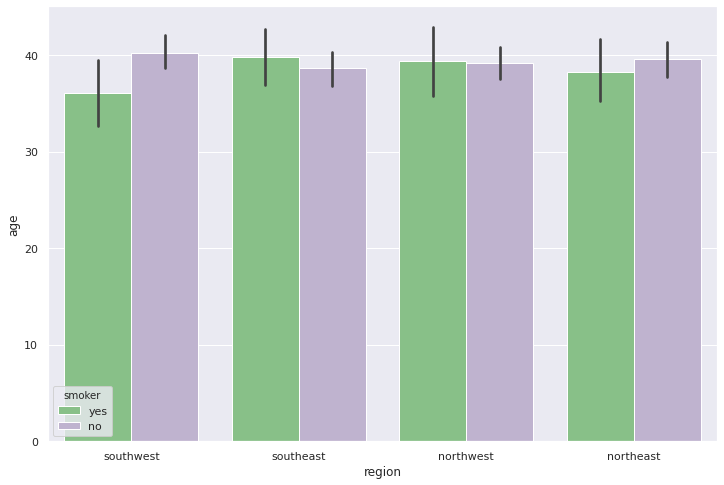

In [26]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'age',
                 hue='smoker', data=df, palette='Accent')

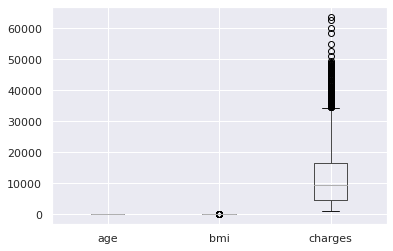

In [27]:
df.boxplot(column = ['age','bmi','charges'])

In [28]:
df[['age','charges']]

,age,charges
0,19,16884.92400
1,18,1725.55230
2,28,4449.46200
3,33,21984.47061
4,32,3866.85520
...,...,...
1333,50,10600.54830
1334,18,2205.98080
1335,18,1629.83350
1336,21,2007.94500


As we can see from the above graphs( barplots) the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast.  This can be seen in the the table data and is now shown in the form of graphs for better interpretetion .
People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than Southwest and Northwest overall. 
And people with children tend to have higher medical costs overall as well

Graaphs of  medical charges by age, bmi and children on the basis of  smoking factor

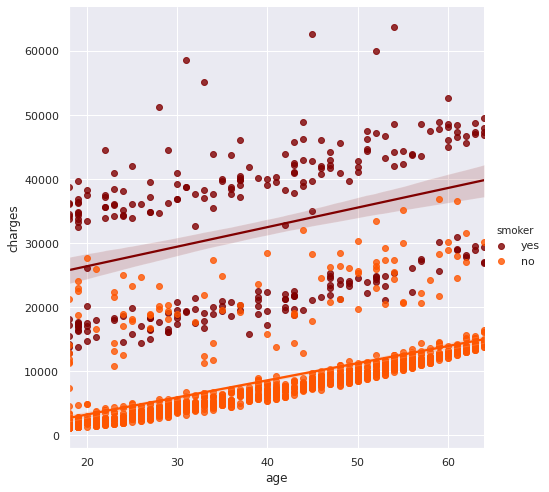

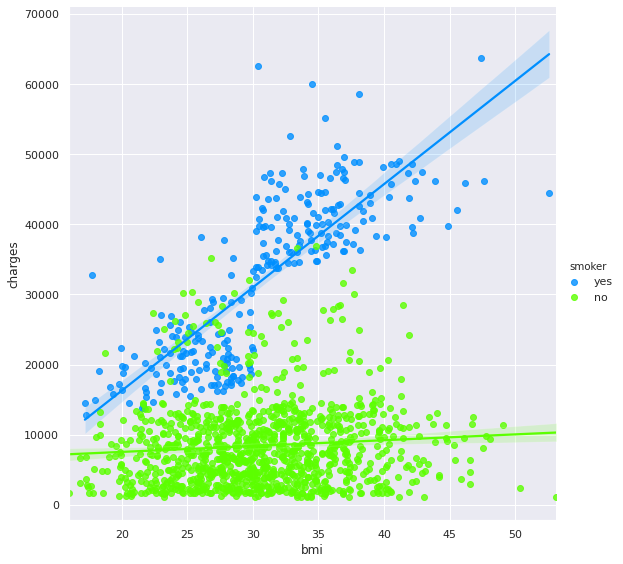

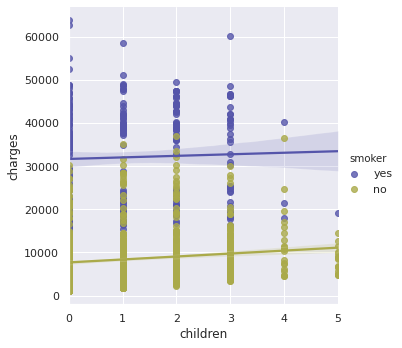

In [73]:
ax=sns.lmplot(x='age' , y='charges' , data=df , hue='smoker' ,height=7, palette='gist_heat' )
ax=sns.lmplot(x='bmi'  , y ='charges' ,data = df , hue='smoker' ,height=8, palette='gist_rainbow_r')
ax=sns.lmplot(x='children' , y='charges', data=df , hue='smoker' , height=5,palette= 'gist_stern')


Graphy of  the medical charges by age, bmi  according to the sex factor

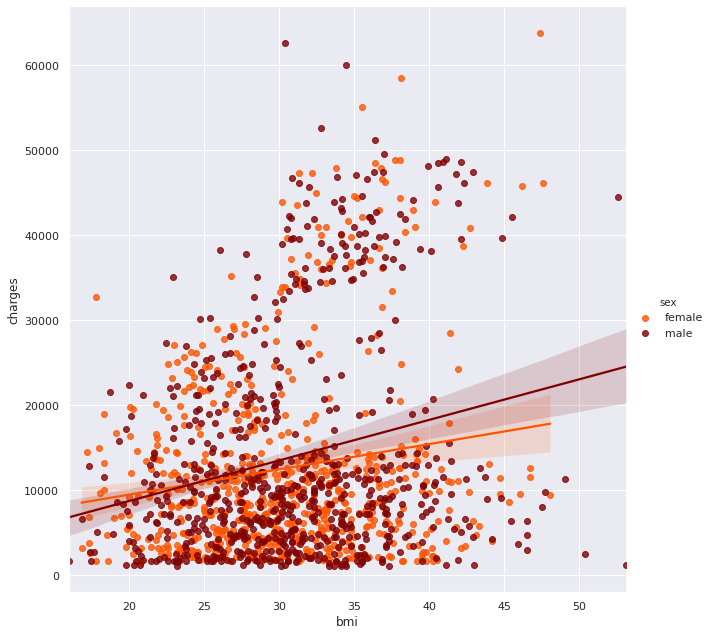

In [67]:
ax=sns.lmplot(x="bmi" , y="charges" , data=df , hue='sex' , height =9,  palette='gist_heat_r')


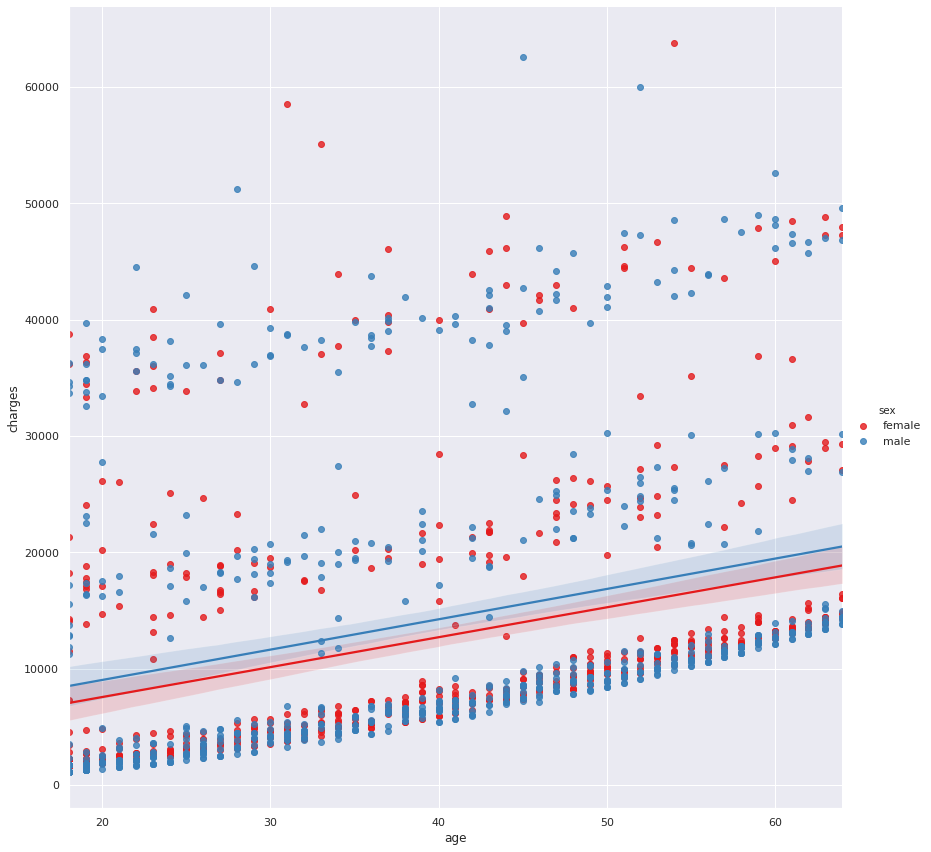

In [72]:
ax=sns.lmplot(x="age" , y="charges" , data=df , hue='sex' , height =12,  palette='Set1')


Smoking has the highest impact on medical costs, even though the costs are growing with sex , age, bmi and children. Also people who have children generally smoke less, which the following boxplot shows too

GRAPHS ON CORRELATION ON VARIOUS "X" FACTORS 

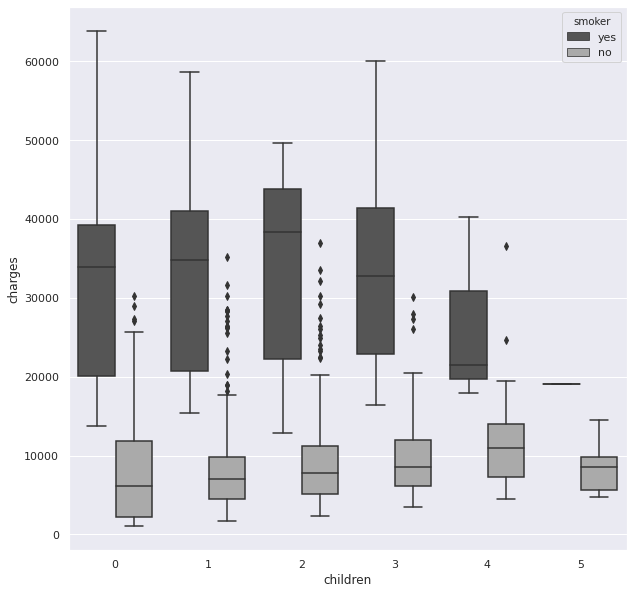

In [81]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.boxplot(x = 'children', y = 'charges', data=df,orient='v', hue='smoker', palette='gray')

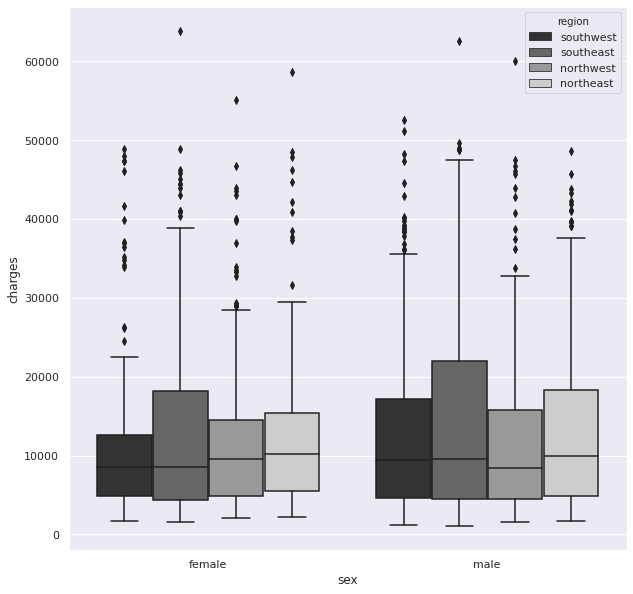

In [83]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.boxplot(x = 'sex', y = 'charges', data=df,orient='v', hue='region', palette='gray')

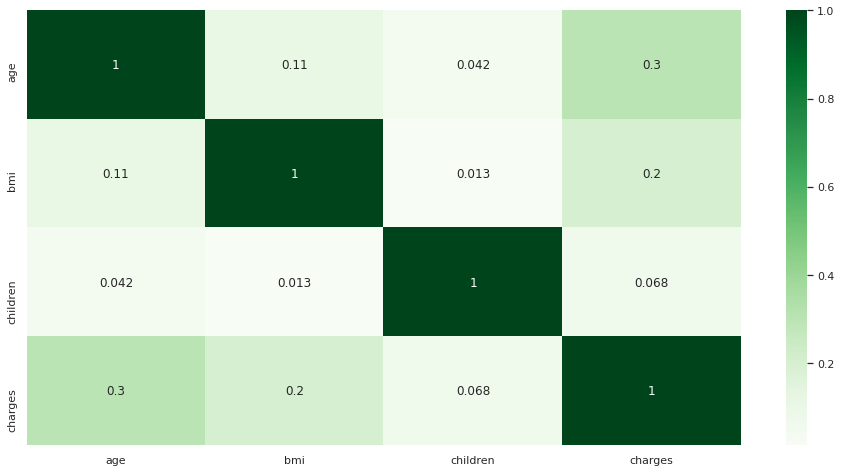

In [89]:
f, ax = plt.subplots(1, 1, figsize=(16,8))
ax = sns.heatmap(df.corr(), annot=True, cmap='Greens')

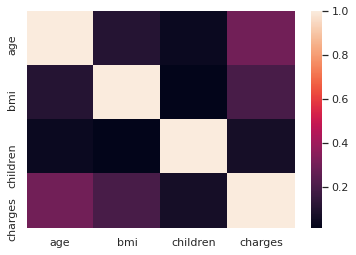

In [91]:
sns.heatmap(df.corr())

#  **Conclusion**

We can note that  smoking is the greatest factor that affects medical cost charges, then it's bmi and age. 